<a href="https://colab.research.google.com/github/matan-avitan/PythonCourse/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

In lecture #3, we saw an example of using the pandas package, with which the can_log_short.csv file was loaded
and received the table can_table.csv.

Write an implementation (a function or several functions) that implements the continuation treatment of the data:
Fill in the missing data in columns C to L according to the following principle: Find a value in a cell that is not empty
and duplicate it backwards until the value in the next non-empty cell or until the beginning of the column

<br/>
<br/>
<br/>

First we need to upload csv to drive
<br/>
<b><u>Important</u></b>: be sure you  upload it to colab folder in your drive and csv name is can_table.csv
<br>
Then we need to mount the drive to google colab

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the csv file from drive (if the path is different please change it)

In [4]:
import pandas as pd
import numpy as np
can_df = pd.read_csv('/content/drive/My Drive/colab/can_table.csv')
can_df

,Unnamed: 0,timestamp,LatAcc,LongAcc,YawRate,SteeringAng,BrkPed,WheelVelR,WheelVelL,TrnsShft,VehSpd,ThrPstn
0,0,1.650198e+09,,,,-2.4375,,,,,,
1,1,1.650198e+09,,,,,0.392157,,,,,
2,2,1.650198e+09,,,,,,4.488,4.492,,,
3,3,1.650198e+09,0.125,-0.3125,,,,,,,,
4,4,1.650198e+09,,,-0.456,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
993,993,1.650198e+09,,,-0.36,,,,,,,
994,994,1.650198e+09,,,,,,,,4.0,,
995,995,1.650198e+09,,,,,,,,,41.4375,
996,996,1.650198e+09,,,,-2.375,,,,,,


By checking the the Dataframe, there are missing values.<br/>
By running dtypes command, Colab print each column type. <br/>
The types of LatAcc to ThrPstn column are <u>object</u> instead of <u>float</u>

In [5]:
can_df.dtypes

Unnamed: 0       int64
timestamp      float64
LatAcc          object
LongAcc         object
YawRate         object
SteeringAng     object
BrkPed          object
WheelVelR       object
WheelVelL       object
TrnsShft        object
VehSpd          object
ThrPstn         object
dtype: object

Inforce those column. to be a numeric column

In [6]:
can_df[can_df.columns[2:12]] = can_df[can_df.columns[2:12]].apply(pd.to_numeric, errors='coerce')
can_df.head()

,Unnamed: 0,timestamp,LatAcc,LongAcc,YawRate,SteeringAng,BrkPed,WheelVelR,WheelVelL,TrnsShft,VehSpd,ThrPstn
0,0,1.650198e+09,NaN,NaN,NaN,-2.4375,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.650198e+09,NaN,NaN,NaN,NaN,0.392157,NaN,NaN,NaN,NaN,NaN
2,2,1.650198e+09,NaN,NaN,NaN,NaN,NaN,4.488,4.492,NaN,NaN,NaN
3,3,1.650198e+09,0.125,-0.3125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.650198e+09,NaN,NaN,-0.456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These functions fill the data backward and forward based on the principle of duplicating values.
<br/>
For each column, the algorithm keeps track of the last index containing a value and its value. The process begins from the first index with the value set to None. The algorithm iterates through the column until it founds a non NaN value, it fills all the values between the last index and the current index with the found value.
<br/>
Finally, the algorithm fill remaining indices that were not handled during the iteration by filling them with the last found value.


In [7]:
def fill_column_missing_data(column: pd.Series) -> None:
  next_index_to_handle = 0
  prev_value = None
  for index, value in enumerate(column):
    if pd.notna(value):
      column.loc[next_index_to_handle:index] = value
      next_index_to_handle = index + 1
      prev_value = value
  if next_index_to_handle < len(column):
    column.loc[next_index_to_handle:] = prev_value

In [8]:
def fill_missing_data(df: pd.DataFrame):
  for column_name in df.columns[2:]:
    column = df[column_name].copy()
    fill_column_missing_data(column=column)
    df[column_name] = column

Run the function on can_df

In [9]:
fill_missing_data(df=can_df)
can_df


,Unnamed: 0,timestamp,LatAcc,LongAcc,YawRate,SteeringAng,BrkPed,WheelVelR,WheelVelL,TrnsShft,VehSpd,ThrPstn
0,0,1.650198e+09,0.1250,-0.3125,-0.456,-2.4375,0.392157,4.488,4.492,4.0,41.578125,0.392157
1,1,1.650198e+09,0.1250,-0.3125,-0.456,-2.4375,0.392157,4.488,4.492,4.0,41.578125,0.392157
2,2,1.650198e+09,0.1250,-0.3125,-0.456,-2.4375,0.392157,4.488,4.492,4.0,41.578125,0.392157
3,3,1.650198e+09,0.1250,-0.3125,-0.456,-2.4375,0.392157,4.492,4.496,4.0,41.578125,0.392157
4,4,1.650198e+09,0.1875,-0.2500,-0.456,-2.4375,0.392157,4.492,4.496,4.0,41.578125,0.392157
...,...,...,...,...,...,...,...,...,...,...,...,...
993,993,1.650198e+09,0.1875,-0.3125,-0.360,-2.3750,0.392157,4.472,4.460,4.0,41.437500,0.392157
994,994,1.650198e+09,0.1875,-0.3125,-0.360,-2.3750,0.392157,4.472,4.460,4.0,41.437500,0.392157
995,995,1.650198e+09,0.1875,-0.3125,-0.360,-2.3750,0.392157,4.472,4.460,4.0,41.437500,0.392157
996,996,1.650198e+09,0.1875,-0.3125,-0.360,-2.3750,0.392157,4.472,4.460,4.0,41.437500,0.392157


<br/><br/><br/>

# Print Graph

<br/>

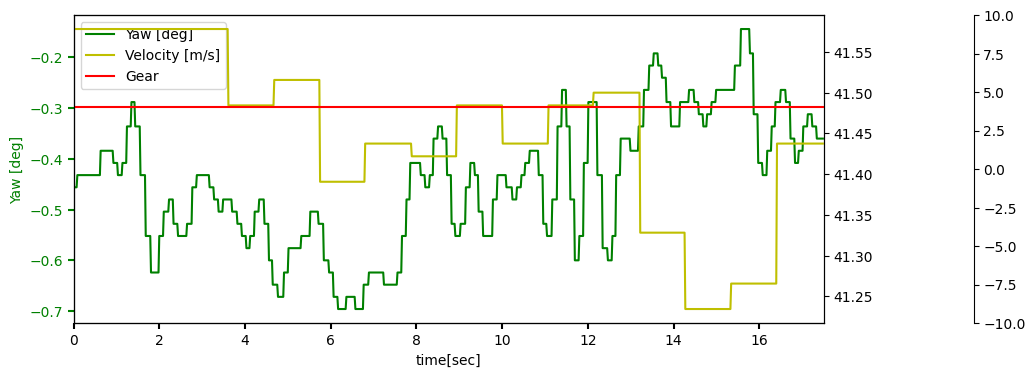

In [13]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 4))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(np.arange(0,17.5,17.5/998), can_df.YawRate, "g-", label="Yaw [deg]")
p2, = twin1.plot(np.arange(0,17.5,17.5/998), can_df.VehSpd, "y-", label="Velocity [m/s]")
p3, = twin2.plot(np.arange(0,17.5,17.5/998), can_df.TrnsShft, "r-", label="Gear")

ax.set_xlim(0, 17.5)
# ax.set_ylim(-3.5, 3.5)
# twin1.set_ylim(0, 16)
twin2.set_ylim(-10.0, 10.0)

ax.set_xlabel("time[sec]")
ax.set_ylabel("Yaw [deg]")
# twin1.set_ylabel("Velocity [m/s]")
# twin2.set_ylabel("Gear")

ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
# twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
# twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
# twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2, p3])

plt.show()

In [227]:


set(can_df.timestamp)

{1650198283.0, 1650198284.0, 1650198285.0}

In [14]:
set(can_df.TrnsShft)

{4.0}